In [5]:
import pandas as pd
import numpy as np
import sklearn as sk
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
path = os.getcwd()
raw_data = pd.read_csv(path+"/train.csv")
raw_data.head()

,Id,PreferedAlbum,Vinyl,AvgTime,TicketInfo,Opinion,Concert,Age,VIP,Food,Drinks,FreePass
0,01/2362,Head Hunters,False,3.055,B/140/N,"Everything worked, yet nothing surprised me. (...",NYC12-5pm,22.0,False,170.0,1.0,True
1,04/0599,Bright Size Life,True,2.510,LB/124/N,"Solid gig—nothing magical, nothing awful. (NYC...",NYC12-5pm,9.0,False,0.0,0.0,True
2,01/3223,Head Hunters,False,0.803,CB/523/N,"Guitars were sharp, but everything else felt r...",NYC12-5pm,NaN,False,815.0,37.0,False
3,01/1966,Kind of Blue,False,0.568,A/81/XL,Feedback screamed louder than the guitars. Dis...,FL16-7pm,36.0,False,1427.0,1395.0,False
4,01/8850,Bright Size Life,False,0.034,B/580/XL,NaN,NYC12-5pm,16.0,False,1299.0,0.0,False


In [ ]:
raw_data["Vinyl"].value_counts(dropna=False)

Vinyl  PreferedAlbum   
False  Head Hunters        3608
True   Head Hunters        1611
False  Kind of Blue        1287
       Bright Size Life    1253
True   Kind of Blue        1073
       Bright Size Life     804
False  NaN                  148
NaN    Head Hunters         131
True   NaN                   83
NaN    Kind of Blue          66
       Bright Size Life      48
       NaN                    4
dtype: int64

<Axes: xlabel='AvgTime', ylabel='Count'>

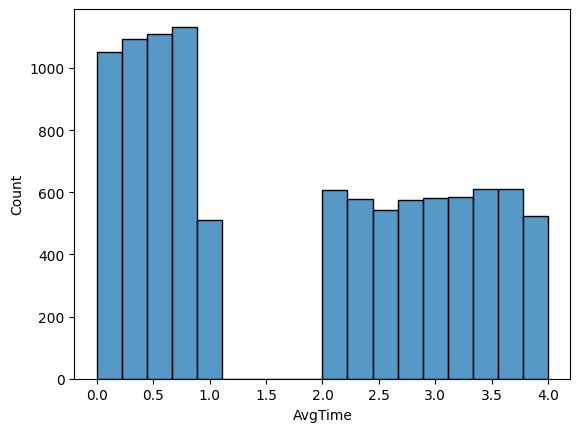

In [11]:
sns.histplot(raw_data, x="AvgTime")

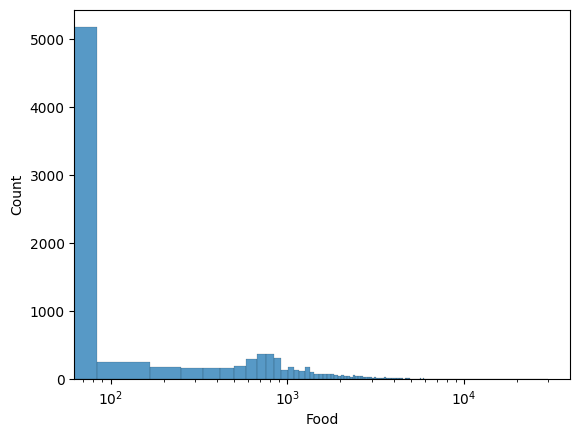

In [13]:
f=sns.histplot(raw_data, x="Food")
f.set_xscale('log')

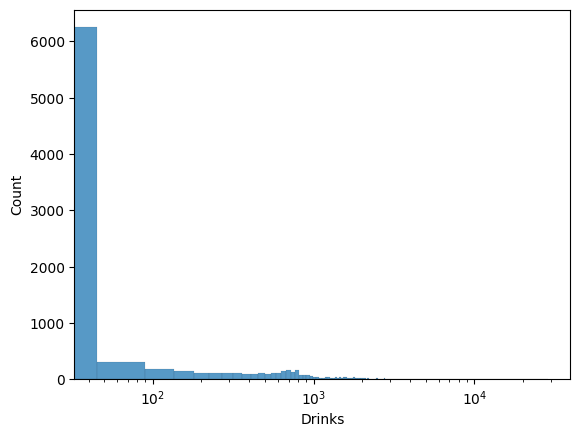

In [15]:
d=sns.histplot(raw_data, x="Drinks")
d.set_xscale('log')

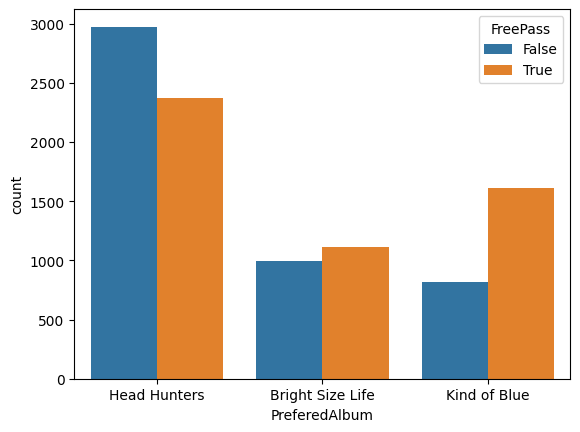

In [ ]:
album_pass = sns.countplot(data=raw_data,
                           x="PreferedAlbum",
                           hue="FreePass")

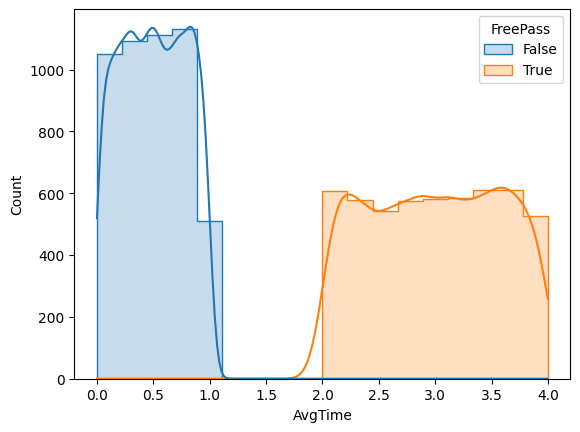

In [21]:
time_pass = sns.histplot(data=raw_data,
                           x="AvgTime",
                           hue="FreePass",
                           kde=True,
                           element='step',
                           stat='count')

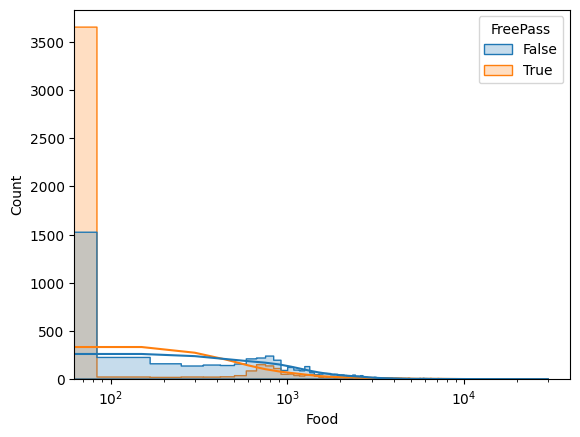

In [46]:
raw_data2 = raw_data[['Food','Drinks',"FreePass","AvgTime"]].fillna(value=0.0)
col = raw_data['Age'].fillna(value=raw_data['Age'].mean())
raw_data2['Age']=col
food_pass = sns.histplot(data=raw_data2,
                           x="Food",
                           hue="FreePass",
                           kde=True,
                           element='step',
                           stat='count',
                           )
food_pass.set_xscale('log')

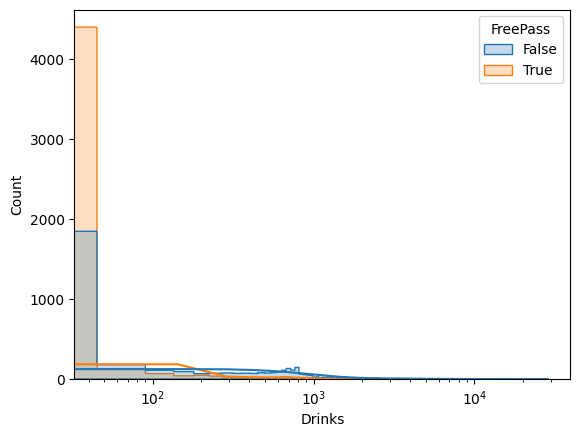

In [43]:
drink_pass = sns.histplot(data=raw_data2,
                           x="Drinks",
                           hue="FreePass",
                           kde=True,
                           element='step',
                           stat='count',
                           )
drink_pass.set_xscale('log')

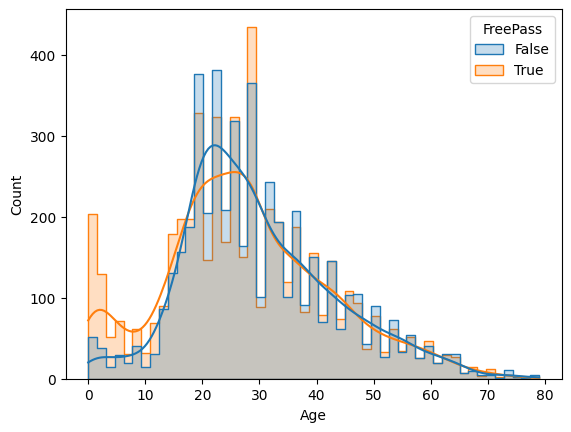

In [42]:
age_pass = sns.histplot(data=raw_data2,
                           x="Age",
                           hue="FreePass",
                           kde=True,
                           element='step',
                           stat='count',
                           )

In [47]:
corr_matrix=pd.DataFrame.corr(raw_data2)

In [48]:
corr_matrix

,Food,Drinks,FreePass,AvgTime,Age
Food,1.000000,0.271226,-0.066998,-0.062637,0.142467
Drinks,0.271226,1.000000,-0.294207,-0.275185,0.146143
FreePass,-0.066998,-0.294207,1.000000,0.938673,-0.074606
AvgTime,-0.062637,-0.275185,0.938673,1.000000,-0.074406
Age,0.142467,0.146143,-0.074606,-0.074406,1.000000


<Axes: >

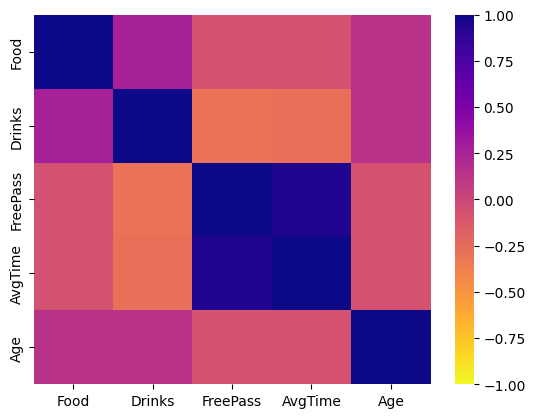

In [ ]:
sns.heatmap(corr_matrix, vmin=-1,vmax=1,cmap='plasma_r',)

In [80]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import textblob as tb

In [78]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stopwords.words('english')]

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/peterclark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/peterclark/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/peterclark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [79]:
opinion_data = raw_data['Opinion']
opinion_data["cleanOpinion"] = raw_data['Opinion'].apply(preprocess_text)

/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_37007/1004913646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_data["cleanOpinion"] = raw_data['Opinion'].apply(preprocess_text)


In [83]:
sia = SentimentIntensityAnalyzer()

opinion_data['sentiment'] = opinion_data['cleanOpinion'].apply(
    lambda x: sia.polarity_scores(x)['compound']
)
opinion_data['sentiment']

0       -0.1695
1        0.4731
2        0.0000
3       -0.7506
4        0.0000
          ...  
10111    0.4588
10112    0.7783
10113    0.5994
10114    0.0000
10115    0.4215
Name: Opinion, Length: 10116, dtype: float64

In [92]:
opinion_data['FreePass']=raw_data["FreePass"]

<Axes: xlabel='sentiment', ylabel='Count'>

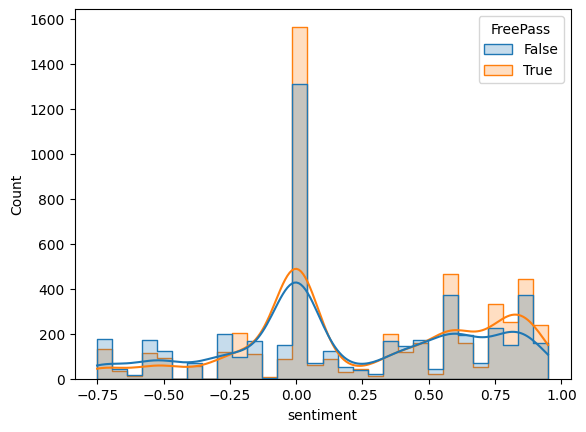

In [93]:
sns.histplot(data=opinion_data, x='sentiment', hue='FreePass',
                           kde=True,
                           element='step',
                           stat='count',
                           )